# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D

from keras.layers.core import Dense, Permute, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

import tensorflow as tf

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('Chinese.mat',0)
len(X), len(T)

(3220, 3220)

In [6]:
X,T = loaddata('French.mat',1)
len(X), len(T)

(11140, 11140)

In [7]:
X,T = loaddata('German.mat',2)
len(X), len(T)

(14700, 14700)

In [8]:
X,T = loaddata('Russian.mat',3)
len(X), len(T)

(18406, 18406)

In [9]:
X,T = loaddata('Spanish.mat',4)
len(X), len(T)

(22030, 22030)

In [10]:
X,T = loaddata('english.mat',5)
len(X), len(T)

(25782, 25782)

## Split Dataset

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((20625, 39, 39), (5157, 39, 39))

## Convert 2D dataset to a 1D vector

In [12]:
batchSize=128
num_classes=6
epochs=10
imageRows, imageCols =39,39

In [13]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [14]:
input_shape

(39, 39, 1)

In [15]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [16]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, activation="relu", input_shape=(39, 39, 1..., kernel_size=(3, 3), padding="same", kernel_regularizer=<keras.reg...)`
  """
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, activation="relu", padding="same", kernel_regularizer=<keras.reg..., kernel_size=(3, 3))`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, activation="relu", padding="same", kernel_regularizer=<keras.reg..., kernel_size=(3, 3))`
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, activatio

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [19]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 20625 samples, validate on 5157 samples
Epoch 1/10
20625/20625 [==============================] - 25s 1ms/step - loss: 2.2792 - acc: 0.7575 - val_loss: 2.9214 - val_acc: 0.6131
Epoch 2/10
20625/20625 [==============================] - 16s 797us/step - loss: 1.2843 - acc: 0.9386 - val_loss: 1.4838 - val_acc: 0.8299
Epoch 3/10
20625/20625 [==============================] - 16s 798us/step - loss: 0.8504 - acc: 0.9647 - val_loss: 1.6074 - val_acc: 0.7789
Epoch 4/10
20625/20625 [==============================] - 18s 877us/step - loss: 0.6125 - acc: 0.9725 - val_loss: 0.6701 - val_acc: 0.9217
Epoch 5/10
20625/20625 [==============================] - 18s 884us/step - loss: 0.4722 - acc: 0.9755 - val_loss: 1.7404 - val_acc: 0.7181
Epoch 6/10
20625/20625 [==============================] - 17s 834us/step - loss: 0.3693 - acc: 0.9833 - val_loss: 1.0863 - val_acc: 0.8142
Epoch 7/10
20625/20625 [==============================] - 18s 880us/step - loss: 0.3371 - acc: 0.9797 - val_loss: 0.422

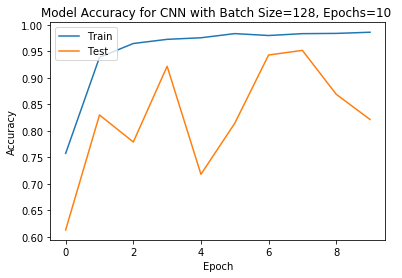

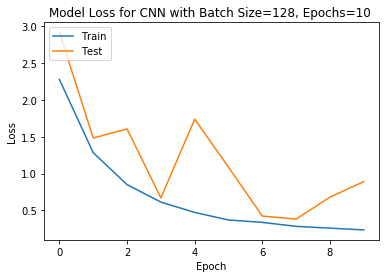

In [20]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
def ConfusionMatrix(actual,predicts,numberClasses,classname):
    nc=numberClasses
    confmat=np.zeros([nc,nc])
    I = pd.Index(classname, name="rows")
    C = pd.Index(classname, name="columns")
    for ri in range (nc):
        value=[]
        trueIndex=np.where(actual[:,ri]==1)
        for j in range (len(trueIndex[0])):
            value.append(predict[trueIndex[0][j]])
        for rj in range (nc):
            confmat[ri][rj]=100*np.mean(value,axis=0)[rj]
    df = pd.DataFrame(data=confmat, index=I, columns=C)
    print(df)
    return

In [22]:
predict=model.predict(Xtrain)
print('Confusion Matrix for Train Data')
ConfusionMatrix(Ytrain,predict,num_classes,['Chinese','French','German','Russian','Spanish','English'])

Confusion Matrix for Train Data
columns    Chinese     French     German    Russian    Spanish    English
rows                                                                     
Chinese  81.498516   1.269699   0.087366   6.565098   0.112983  10.466356
French    0.000333  99.981987   0.006545   0.000913   0.000152   0.013780
German    1.200773  36.779109  58.068097   0.985217   0.477005   2.489798
Russian   0.619481   4.721814   0.386770  88.360047   0.340332   5.571434
Spanish  24.585435   1.376489   1.144964   7.418255  53.032410  12.442441
English   0.021168   2.109005   0.004021   0.027560   0.001789  97.836453


In [23]:
predict=model.predict(Xtest)
print('Confusion Matrix for Test Data')
ConfusionMatrix(Ytest,predict,num_classes,['Chinese','French','German','Russian','Spanish','English'])

Confusion Matrix for Test Data
columns    Chinese     French     German    Russian    Spanish    English
rows                                                                     
Chinese  74.665833   1.770311   0.216269   7.168248   0.175860  16.003463
French    0.000385  99.960804   0.006688   0.001013   0.000165   0.031109
German    1.638456  39.301500  54.478216   0.910056   0.415294   3.256520
Russian   1.114121   5.007247   0.480444  86.821645   0.715374   5.861123
Spanish  25.984174   1.382010   1.008746   7.715692  50.611168  13.298233
English   0.111213   2.836114   0.005583   0.035627   0.003169  97.008365
